In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

**Problem 1**

In [2]:
# Boltzmann constant in kJ/mol
kb = 1.38064852e-23
# Planck's constant
h = 6.62607004e-34
# Avogadro's number
NA = 6.0221409e23
# Speed of light
c = 299792458
T = 850
hbar = h/(2*np.pi)

**Z_trans For NH3, N2, H2**


In [3]:
mass1=17.031/(NA*1000)
NH3_trans = ((math.sqrt(2*np.pi*mass1*kb*T))/(h))**3

In [4]:
mass2=28.014/(NA*1000)
N2_trans = (((math.sqrt(2*np.pi*mass2*kb*T))/(h))**3)**0.5

In [5]:
mass3=2.106/(NA*1000)
H2_trans = (((math.sqrt(2*np.pi*mass3*kb*T))/(h))**3)**1.5

In [6]:
K_trans = (NH3_trans)/(N2_trans*H2_trans)

In [7]:
K_trans*6.022e26

0.0001396882423144506

**Z_rot for NH3, N2, H2**

In [8]:
T = 850
A = 23.93
N2_rot = ((kb*T/2*A))**0.5

In [9]:
T = 850
B = 728.64
H2_rot = ((kb*T/2*B))**1.5

In [10]:
T = 850
C = 113.08
D = 113.08
E = 74.19

NH3_rot = (math.sqrt(np.pi)/6)*(math.sqrt((kb*T)**3)/math.sqrt((C*D*E)))

In [11]:
K_rot = (NH3_rot)/(N2_rot*H2_rot)
print(K_rot)

116.39472552384274


**Z_vib for NH3, N2, H2**

In [12]:
w =7.07e13
sigmavib = (hbar*w/kb)
T = 850
N2vib = np.exp(-sigmavib/(2*T))/(1-np.exp(-sigmavib/T))**0.5
print(N2vib)

1.061412768154915


In [13]:
w = 1e14
sigmavib = (hbar*w/kb)
T = 850
NH3_1vib = np.exp(-sigmavib/(2*T))/(1-np.exp(-sigmavib/T))

In [14]:
w =2.85e13
sigmavib = (hbar*w/kb)
T = 850
NH3_2vib = np.exp(-sigmavib/(2*T))/(1-np.exp(-sigmavib/T))

In [15]:
w =1.03e14
sigmavib = (hbar*w/kb)
T = 850
NH3_3vib = np.exp(-sigmavib/(2*T))/(1-np.exp(-sigmavib/T))

In [16]:
w = 4.88e13
sigmavib = (hbar*w/kb)
T = 850
NH3_4vib = np.exp(-sigmavib/(2*T))/(1-np.exp(-sigmavib/T))

In [17]:
NH3_total_vibtotal = NH3_1vib*NH3_2vib*NH3_3vib*NH3_4vib

In [18]:
w = 1.32e14
sigmavib = (hbar*w/kb)
T =850
H2vib = (np.exp(-sigmavib/(2*T))/(1-np.exp(-sigmavib/T)))**1.5

In [19]:
K_vib_total = N2vib*NH3_total_vibtotal*H2vib
print(K_vib_total)

7.446327698346318


**Z_el for NH3, N2,H2**

In [38]:
NH3el = np.exp(-12.88/(kb*T))
print(NH3el)

0.0


In [35]:
N2el = (np.exp((-9.788/kb*T )))**0.5 

In [36]:
H2el = (np.exp(-(4.74/kb*T )))**1.5

In [37]:
K_el = NH3el*N2el*H2el
print(K_el)

0.0


**Keq at 850C**

In [40]:
Keq = (K_trans*6.022e26)*K_rot*K_vib_total
print(Keq)

0.12106965308268834


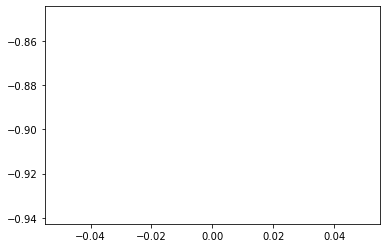

In [48]:
#Haber Empirical Fit
T = 850
Keq_log = (2.1+(2098/T) - 2.5088*math.log10( T ) - 1.066e-4*T +1.86e-7 * T**2) + math.log10( 0.0821 *T )
plt.plot(Keq_log)

**Problem 2**

In [56]:
from openmm.app import *
from openmm import *
from openmm.unit import *

In [58]:
pdb = PDBFile('waterbox.pdb')
ff = ForceField('tip3p.xml')

In [59]:
system = ff.createSystem(pdb.topology, nonbondedMethod=PME, nonbondedCutoff=0.9*nanometer, rigidWater=True) 

In [60]:
integ = LangevinIntegrator(300*kelvin, 1.0/picosecond, 2*femtosecond) 

In [61]:
baro = MonteCarloBarostat(1.0*atmosphere, 300*kelvin)

In [62]:
system.addForce(baro)

4

In [63]:
simul = Simulation(pdb.topology, system, integ)

In [64]:
simul.context.setPositions(pdb.positions)

In [65]:
simul.context.getState(getEnergy=True).getPotentialEnergy()

Quantity(value=-36027.280711420346, unit=kilojoule/mole)

In [66]:
simul.reporters.append(DCDReporter('waterbox-dynamics.dcd', 100))

In [67]:
import sys

In [68]:
simul.reporters.append(StateDataReporter(sys.stdout, 1000, step=True, totalEnergy=True, temperature=True,density=True, progress=True, speed=True, separator='\t', totalSteps=50000))
simul.step(50000)

#"Progress (%)"	"Step"	"Total Energy (kJ/mole)"	"Temperature (K)"	"Density (g/mL)"	"Speed (ns/day)"
2.0%	1000	-30988.32898668843	281.0369193008113	0.9948676729182415	--
4.0%	2000	-29913.761623878265	288.98657636865283	1.001694341427574	59.4
6.0%	3000	-29481.09505448147	293.03077448957026	0.9796594597565658	53.9
8.0%	4000	-28889.464993430272	296.86499141485	0.9741659802434228	55.8
10.0%	5000	-28754.070227312593	303.1120665385679	0.9757217698346016	54.5
12.0%	6000	-28655.760185015533	296.9288646328187	0.9719823357775571	55.6
14.0%	7000	-28727.60273816454	302.7577878024505	0.9733252017570726	56.9
16.0%	8000	-28826.205803215853	305.93422123704113	0.9883271479650166	55.7
18.0%	9000	-29236.590881994314	290.37079127394935	0.9833392893947985	55.3
20.0%	10000	-28726.134113667184	309.7628269567329	0.9812067259247843	55.1
22.0%	11000	-28999.42666381228	294.0900096573489	0.9635021707158712	54.9
24.0%	12000	-28883.19331672936	296.68278496086776	0.9743434018588703	53.8
26.0%	13000	-28666.99356373807

**Part B and C**

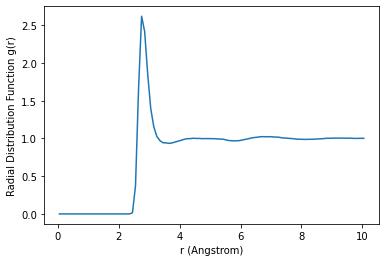

In [70]:
#300K
data = np.loadtxt('rdf_graph_300K_tip3p.dat')
x = data[:,0]
y = data[:,1]
integral = data[:,2]
plt.plot(x,y)
plt.xlabel('r (Angstrom)')
plt.ylabel('Radial Distribution Function g(r)')
plt.show()

In [72]:
pdb = PDBFile('waterbox.pdb')
ff = ForceField('tip3p.xml')
system = ff.createSystem(pdb.topology, 
                         nonbondedMethod=PME, 
                         nonbondedCutoff=0.9*nanometer, rigidWater=True) #creates interactions
integ = LangevinIntegrator(370*kelvin, 1.0/picosecond, 2*femtosecond) #give integrator timestep*unit variable
baro = MonteCarloBarostat(1.0*atmosphere, 370*kelvin) #pressure, temp, attempt freq
system.addForce(baro)
simul = Simulation(pdb.topology, system, integ)
simul.context.setPositions(pdb.positions)
simul.context.getState(getEnergy=True).getPotentialEnergy()
simul.reporters.append(DCDReporter('waterbox-dynamics-370.dcd', 100))
import sys
simul.reporters.append(StateDataReporter(sys.stdout, 1000, step=True, totalEnergy=True, temperature=True,
                  density=True, progress=True, speed=True, separator='\t', totalSteps=50000))
simul.step(50000)

#"Progress (%)"	"Step"	"Total Energy (kJ/mole)"	"Temperature (K)"	"Density (g/mL)"	"Speed (ns/day)"
2.0%	1000	-27256.06736964875	317.44773441145986	0.9738641040908603	--
4.0%	2000	-25424.982686531992	358.54254455183263	0.9386831350243229	62.7
6.0%	3000	-24793.586177106365	369.2148204514073	0.9281807287032081	62
8.0%	4000	-24564.884012505674	360.0079368786157	0.905541107237604	62.4
10.0%	5000	-24297.910009527463	362.34560511611744	0.9179390799805428	60.6
12.0%	6000	-24480.186380494328	355.4529438078958	0.9231426507025606	61.4
14.0%	7000	-23970.56117695963	371.9541243439457	0.917226779508387	61.9
16.0%	8000	-24118.601213955786	371.8862705616505	0.9062477157320317	61.9
18.0%	9000	-23645.911157434923	377.80949769355595	0.9180763161773947	61.9
20.0%	10000	-23855.99292238435	382.69378440962134	0.919229834129483	62.2
22.0%	11000	-24032.95564018021	368.61057785352716	0.9148019443858386	62.4
24.0%	12000	-24144.96215651068	383.93940998425285	0.9077441673801246	62.6
26.0%	13000	-24101.36479713922

**Part D**

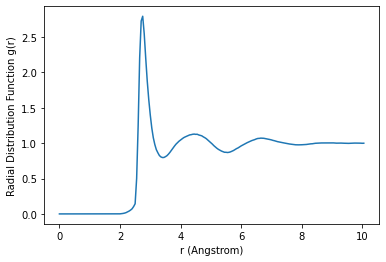

In [73]:
#370
data = np.loadtxt('oo.als_bestfit.dat')
x = data[:,0]
y = data[:,1]
plt.plot(x,y)
plt.xlabel('r (Angstrom)')
plt.ylabel('Radial Distribution Function g(r)')
plt.show()

**Part E**

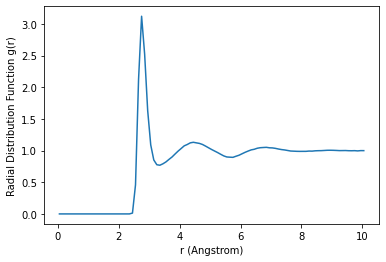

In [74]:
#300K
data = np.loadtxt('rdf_graph_300K_tip3pfb.dat')
x = data[:,0]
y = data[:,1]
plt.plot(x,y)
plt.xlabel('r (Angstrom)')
plt.ylabel('Radial Distribution Function g(r)')
plt.show()

In [75]:
pdb = PDBFile('waterbox.pdb')
ff = ForceField('tip3pfb.xml')
system = ff.createSystem(pdb.topology, nonbondedMethod=PME,nonbondedCutoff=0.9*nanometer, rigidWater=True)
integ = LangevinIntegrator(300*kelvin, 1.0/picosecond, 2*femtosecond) 
baro = MonteCarloBarostat(1.0*atmosphere, 300*kelvin) 
system.addForce(baro)
simul = Simulation(pdb.topology, system, integ)
simul.context.setPositions(pdb.positions)
simul.context.getState(getEnergy=True).getPotentialEnergy()
simul.reporters.append(DCDReporter('waterbox-dynamics-300-tip3pfb.dcd', 100))
import sys
simul.reporters.append(StateDataReporter(sys.stdout, 1000, step=True, totalEnergy=True, temperature=True,density=True, progress=True, speed=True, separator='\t', totalSteps=50000))
simul.step(50000)

#"Progress (%)"	"Step"	"Total Energy (kJ/mole)"	"Temperature (K)"	"Density (g/mL)"	"Speed (ns/day)"
2.0%	1000	-37566.85621181631	291.34426107950895	0.9949917752475999	--
4.0%	2000	-37264.0139245016	304.4232410624861	0.9965706551771832	37.7
6.0%	3000	-36939.23297019373	299.3041100167389	1.0000954392205308	36.6
8.0%	4000	-37078.18259756401	298.1255292055471	0.996632907745608	40.6
10.0%	5000	-37284.204075441434	302.0688360237773	0.9952296936613864	43.8
12.0%	6000	-37101.28564487782	299.81103997122227	1.0037647796459424	46.2
14.0%	7000	-37197.05470448072	293.602907078831	0.9986415780211959	48
16.0%	8000	-37263.18417467343	296.72265295728266	1.0110982422512693	49
18.0%	9000	-36793.3535578732	310.07440225932584	1.001194899438242	49.9
20.0%	10000	-36922.98070915611	308.3893555564935	1.0045066538508285	50.9
22.0%	11000	-37074.280480569985	293.0552659205134	1.0049620898899159	51.5
24.0%	12000	-37010.01887902181	300.9071310324841	0.9851023364506388	51.5
26.0%	13000	-37025.45598596701	295.2517377